### Описание набора данных
В данной работе используется [github_dataset.csv] - Набор данных из 1052 репозиториев с Github, содержащий информацию об основном языке, который используется в репозитории, количество открытых и закрытых pull request'ов, fork'ов и открытых и закрытых issues. Характер данных реальный и взят из существующих репозиториев. Необходимо иметь в виду, что данные относятся к определенному временному промежутку и не обновляются в текущем наборе.

#### Описание аттрибутов, представленных в наборе данных
|     Аттрибут     |   Тип данных    | Описание                                                           |
|:----------------:|:---------------:|:-------------------------------------------------------------------|
|   repositories   |    Строковый    | название репозитория в формате ник_владельца/название_репозитория  |
|   stars_count    |  Целочисленный  | количество звезд репозитория                                       |
|   forks_count    |  Целочисленный  | количество fork'ов репозитория                                     |
|   issues_count   |  Целочисленный  | открытые/закрытые issues                                           |
|  pull_requests   |  Целочисленный  | открытые/закрытые pull request'ы в проекте                         |
|   contributors   |    Строковый    | участники, вносившие вклад в развитие проекта                      |
|     language     |    Строковый    | основной язык программирования, используемый в репозитории         |
#### Описание задачи для анализа
В качестве задачи для анализа можно выделить рекомендацию репозитория, в котором разработчик может найти что-то интересное для себя, либо законтрибьютить в open-source проект.

In [97]:
import pandas

pandas.read_csv('github_dataset.csv')

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


### Вычисление среднего значения и СКО для каждого аттрибута

In [38]:
import pandas

df_github = pandas.read_csv('github_dataset.csv')
numeric_data_set_columns = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]
results = []
for column in numeric_data_set_columns:
    results.append([column, df_github[column].mean(), df_github[column].std()])
pandas.DataFrame(results, columns=["Имя аттрибута", 'Среднее значение', "СКО"])

,Имя аттрибута,Среднее значение,СКО
0,stars_count,81.976236,170.403116
1,forks_count,53.884981,127.699729
2,issues_count,8.656844,32.445154
3,pull_requests,4.374525,27.913732
4,contributors,8.364068,37.511807


### Определение выбросов в наборе данных
Это экстремальные значения во входных данных, которые находятся далеко за пределами других наблюдений. Например, все предметы на кухне имеют температуру около 22-25 грудусов Цельсия, а — духовка 220.
На основе размерности изучаемого массива данных выбросы подразделяют на одномерные и многомерные.
##### Одномерные выбросы
Точка является выбросом только по одной из своих координат.
##### Многомерные выбросы
Точка является выбросом сразу по нескольким координатам.
Другой подход классификации выбросов — по их окружению.
##### Точечные выбросы
Единичные точки, выбивающиеся из общей картины. Точечные аномалии часто используются в системах контроля транзакций для выявления мошенничества, например, когда с украденной карты совершается крупная покупка.
##### Контекстуальные выбросы
Для того, чтобы определить, является ли точка выбросом необходим контекст. Например, в Петербурге +15 градусов Цельсия. Зимой такая температура является выбросом, а летом нет.
##### Коллективные выбросы
Здесь выбросом является не точка, а группа точек. Примером таких выбросов могут служить, например, задержки поставок на фабрике. Одна задержка не является выбросом. Но если их много, значит это может стать проблемой.

#### Построение гистограмм
С помощью гистограммы явно определить выбросы в наборе данных не удалось из-за специфики данных.

In [ ]:
import pandas


def draw_hist(column_name, figsize=(10, 10), bins=50, is_grid_enabled=True):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.hist(df_github[column_name], bins=bins)
    plt.grid(is_grid_enabled)
    plt.title(f"Распределение {column_name}")


df_github = pandas.read_csv('github_dataset.csv')
numeric_data_set_columns = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]
for column in numeric_data_set_columns:
    draw_hist(column)

#### Максимальное и минимальное значение
На некоторых наборах данных с помощью минимального и максимального значения появится возможность определить выбросы.
В нашем случае данный способ не позволит явно определить выбросы.

In [50]:
import pandas

pandas.read_csv('github_dataset.csv').describe().loc[['min', 'max']]

,stars_count,forks_count,issues_count,pull_requests,contributors
min,0.0,0.0,1.0,0.0,0.0
max,995.0,973.0,612.0,567.0,658.0


#### Процентили
Этот метод обнаружения посторонних значений основан на процентилях. При использовании метода процентилей все наблюдения,выходящие за пределы интервала, образованного 2,5 и 97,5 процентилями будут рассматриваться как потенциальные выбросы.
Из всех способов перечисленных в документе, данный способ определил выбросы более правильно, но здесь нужно остановиться и понять точно ли найденные выбросы являются выбросами, которые не стоит учитывать.

In [ ]:
import pandas

df_github = pandas.read_csv('github_dataset.csv')
numeric_data_set_columns = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]
for column in numeric_data_set_columns:
    print(f"----------------   {column}   ----------------")
    lower_bound = df_github[column].quantile(q=0.025)
    print(f"------- lower_bound = ${lower_bound}")
    upper_bound = df_github[column].quantile(q=0.975)
    print(f"------- upper_bound = ${upper_bound}")
    display(df_github[(df_github[column] < lower_bound) | (df_github[column] > upper_bound)])

#### Фильтр Хэмпеля
Метод, известный как фильтр Хэмпеля, заключается в том, чтобы рассматривать как выбросы значения вне интервала, которые формируются медианным значением +- 3 медианы абсолютных отклонений (MAD).
MAD — это медианное абсолютное отклонение и определяется как медиана абсолютных отклонений от медианы данных.
Из-за специфики данных метод не совсем подходит к определению вбросов на текущем наборе данных.

In [110]:
import pandas

"""
    https://stackoverflow.com/questions/46819260/filtering-outliers-how-to-make-median-based-hampel-function-faster
"""


def hampel(vals_orig):
    import numpy as np
    vals = vals_orig.copy()
    difference = np.abs(vals.median() - vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return (vals)


df_github = pandas.read_csv('github_dataset.csv')
numeric_data_set_columns = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]
for column in numeric_data_set_columns:
    print(f"----------------   {column}   ----------------")
    print(f"quantity of outliers in | {column} |  -> {hampel(df_github[column]).isna().sum()}")


----------------   stars_count   ----------------
quantity of outliers in | stars_count |  -> 303
----------------   forks_count   ----------------
quantity of outliers in | forks_count |  -> 332
----------------   issues_count   ----------------
quantity of outliers in | issues_count |  -> 275
----------------   pull_requests   ----------------
quantity of outliers in | pull_requests |  -> 435
----------------   contributors   ----------------
quantity of outliers in | contributors |  -> 148


### Поиск пропущенных значений
Для построения точной модели необходимо знать как эффективно обработать пропущенные значения для уменьшения погрешности.
В нашем случае пропущенными значениями являются значения из столбца "language". Значения NaN в столбце "language" будут иметь репозитории, которые не содержат в себе файлы, расширения которых указывают на какой-либо ЯП. Скорее всего такие репозитории не содержат файлов для исполнения программного кода. Во время обработки таких значений, можно иметь в виду, что в репозитории нет файлов с кодом, написанным на определенном ЯП, и в зависимости от поставленной задачи либо убирать, либо учитывать такие записи.

In [95]:
import pandas

df_github = pandas.read_csv('github_dataset.csv')
pandas.isna(df_github).sum()

repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

### Определение корреляции между параметрами [https://nafi.ru/upload/spss/Lection_6.pdf]
Виды корреляционной связи между измеренными переменными могут быть различны: так корреляция бывает линейной и нелинейной, положительной и отрицательной. Она линейна, если с увеличением или уменьшением одной переменной, вторая переменная также растёт, либо убывает. Она нелинейна, если при увеличении одной величины характер изменения второй не линеен, а описывается другими законами (полиномиальная, гиперболическая).

Если повышение уровня одной переменной сопровождается повышением уровня другой, то речь идет о положительной корреляции. Чем выше личностная тревожность, тем больше риск заболеть язвой желудка. Возрастание громкости звука сопровождается ощущением повышения его тона.

Если рост уровня одной переменной сопровождается снижением уровня другой, то мы имеем дело с отрицательной корреляцией. По данным Зайонца, число детей в семье отрицательно коррелирует с уровнем их интеллекта. Чем боязливей особь, тем меньше у нее шансов занять доминирующее положение в группе. Нулевой называется корреляция при отсутствии связи переменных.

---
| Значение<br/> по модулю |      Интерпретация      |
|:-----------------------:|:-----------------------:|
|         до 0.2          | очень слабая корреляция |
|         до 0.5          |    слабая корреляция    |
|         до 0.7          |   средняя корреляция    |
|         до 0.9          |   высокая корреляция    |
|        свыше 0.9        |      очень высокая      |
После вычисления корреляции в наборе данных, можно сделать вывод, что все атрибуты обладают слабой связью и все обладают корреляцией.


In [119]:
import pandas

df_github = pandas.read_csv('github_dataset.csv')
df_github.corr(numeric_only=True)

,stars_count,forks_count,issues_count,pull_requests,contributors
stars_count,1.000000,0.250037,0.060943,-0.004548,0.059866
forks_count,0.250037,1.000000,0.123204,0.048063,0.263042
issues_count,0.060943,0.123204,1.000000,0.324541,0.382578
pull_requests,-0.004548,0.048063,0.324541,1.000000,0.183981
contributors,0.059866,0.263042,0.382578,0.183981,1.000000


### Построение матрицы графиков рассеяния
На диаграмме рассеяния каждому наблюдению (или элементарной единице набора данных) соответствует точка, координаты которой равны значениям двух каких-то параметров этого наблюдения. Если предполагается, что один из параметров зависит от другого, то обычно значения независимого параметра откладывается по горизонтальной оси, а значения зависимого — по вертикальной. Диаграммы рассеяния используются для демонстрации наличия или отсутствия корреляции между двумя переменными.

Матрица диаграмм рассеяния позволяет понять попарные отношения между различными переменными в наборе данных.
Способ интерпретации матрицы следующий:
- Распределение каждой переменной показано в виде гистограммы в диагональных прямоугольниках.
- Во всех остальных полях отображается диаграмма рассеяния отношений между каждой парной комбинацией переменных.

In [ ]:
import pandas

df_github = pandas.read_csv('github_dataset.csv')
pandas.plotting.scatter_matrix(df_github, grid=True, figsize=(20, 20))

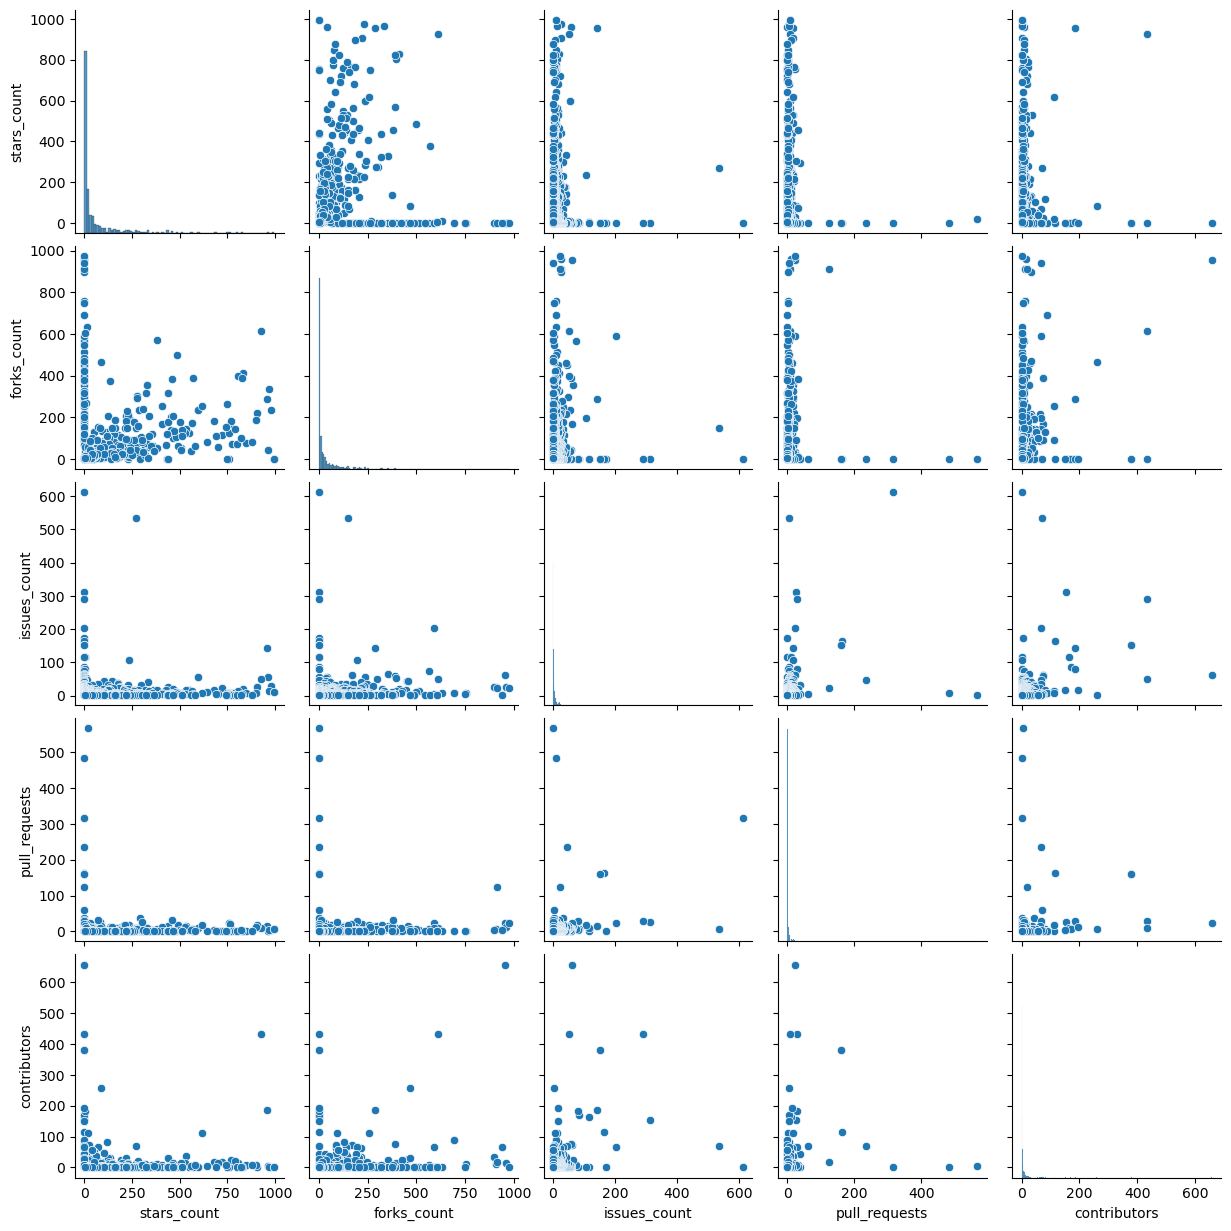

In [122]:
import seaborn as sns

df_github = pandas.read_csv('github_dataset.csv')
sns.pairplot(df_github)